## Convolutional Autoencoder

In [2]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

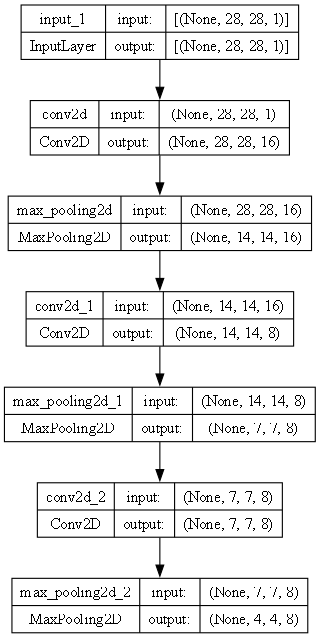

In [11]:
# plot_model autoencoder

from keras.utils import plot_model

plot_model(autoencoder, to_file='CNN_Autoencoder/autoencoder.png',dpi=80, show_shapes=True)
plot_model(encoder, to_file='CNN_Autoencoder/encoder.png',dpi=80, show_shapes=True)

In [3]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [12]:
import tensorflow as tf
import shutil
from keras.callbacks import ModelCheckpoint

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs

# Mac/Linux
# !rm -rf ./logs/

# Windows
shutil.rmtree("./logs", ignore_errors=True)

checkpointCNN = ModelCheckpoint("best_autoencoderCNN", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Define the TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

callbacks_list = [checkpointCNN, tensorboard_callback]


# Add the TensorBoard callback to the fit method
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks_list) # added callback

# Start TensorBoard
%tensorboard --logdir logs


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
234/235 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 1: val_loss improved from inf to 0.09296, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0937 - val_loss: 0.0930
Epoch 2/100
234/235 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 2: val_loss improved from 0.09296 to 0.09265, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0935 - val_loss: 0.0927
Epoch 3/100
234/235 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 3: val_loss improved from 0.09265 to 0.09231, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 56ms/step - loss: 0.0934 - val_loss: 0.0923
Epoch 4/100
234/235 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 4: val_loss improved from 0.09231 to 0.09217, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 56ms/step - loss: 0.0933 - val_loss: 0.0922
Epoch 5/100
234/235 [============================>.] - ETA: 0s - loss: 0.0932
Epoch 5: val_loss improved from 0.09217 to 0.09202, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 57ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 6/100
234/235 [============================>.] - ETA: 0s - loss: 0.0930
Epoch 6: val_loss did not improve from 0.09202
235/235 [==============================] - 13s 56ms/step - loss: 0.0930 - val_loss: 0.0922
Epoch 7/100
234/235 [============================>.] - ETA: 0s - loss: 0.0930
Epoch 7: val_loss improved from 0.09202 to 0.09169, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 8/100
234/235 [============================>.] - ETA: 0s - loss: 0.0928
Epoch 8: val_loss did not improve from 0.09169
235/235 [==============================] - 14s 58ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 9/100
234/235 [============================>.] - ETA: 0s - loss: 0.0927
Epoch 9: val_loss improved from 0.09169 to 0.09160, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 10/100
234/235 [============================>.] - ETA: 0s - loss: 0.0926
Epoch 10: val_loss improved from 0.09160 to 0.09143, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 62ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 11/100
234/235 [============================>.] - ETA: 0s - loss: 0.0925
Epoch 11: val_loss did not improve from 0.09143
235/235 [==============================] - 13s 57ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 12/100
234/235 [============================>.] - ETA: 0s - loss: 0.0924
Epoch 12: val_loss did not improve from 0.09143
235/235 [==============================] - 13s 54ms/step - loss: 0.0924 - val_loss: 0.0915
Epoch 13/100
234/235 [============================>.] - ETA: 0s - loss: 0.0924
Epoch 13: val_loss did not improve from 0.09143
235/235 [==============================] - 12s 53ms/step - loss: 0.0924 - val_loss: 0.0914
Epoch 14/100
234/235 [============================>.] - ETA: 0s - loss: 0.0922
Epoch 14: val_loss improved from 0.09143 to 0.09126, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 56ms/step - loss: 0.0922 - val_loss: 0.0913
Epoch 15/100
234/235 [============================>.] - ETA: 0s - loss: 0.0921
Epoch 15: val_loss improved from 0.09126 to 0.09105, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 13s 57ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 16/100
234/235 [============================>.] - ETA: 0s - loss: 0.0920
Epoch 16: val_loss did not improve from 0.09105
235/235 [==============================] - 13s 55ms/step - loss: 0.0920 - val_loss: 0.0915
Epoch 17/100
234/235 [============================>.] - ETA: 0s - loss: 0.0920
Epoch 17: val_loss improved from 0.09105 to 0.09101, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0920 - val_loss: 0.0910
Epoch 18/100
234/235 [============================>.] - ETA: 0s - loss: 0.0920
Epoch 18: val_loss did not improve from 0.09101
235/235 [==============================] - 14s 59ms/step - loss: 0.0920 - val_loss: 0.0915
Epoch 19/100
234/235 [============================>.] - ETA: 0s - loss: 0.0918
Epoch 19: val_loss did not improve from 0.09101
235/235 [==============================] - 13s 53ms/step - loss: 0.0918 - val_loss: 0.0911
Epoch 20/100
234/235 [============================>.] - ETA: 0s - loss: 0.0917
Epoch 20: val_loss improved from 0.09101 to 0.09077, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.0917 - val_loss: 0.0908
Epoch 21/100
234/235 [============================>.] - ETA: 0s - loss: 0.0917
Epoch 21: val_loss improved from 0.09077 to 0.09063, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0917 - val_loss: 0.0906
Epoch 22/100
234/235 [============================>.] - ETA: 0s - loss: 0.0916
Epoch 22: val_loss did not improve from 0.09063
235/235 [==============================] - 13s 57ms/step - loss: 0.0916 - val_loss: 0.0906
Epoch 23/100
234/235 [============================>.] - ETA: 0s - loss: 0.0915
Epoch 23: val_loss improved from 0.09063 to 0.09059, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0915 - val_loss: 0.0906
Epoch 24/100
234/235 [============================>.] - ETA: 0s - loss: 0.0915
Epoch 24: val_loss improved from 0.09059 to 0.09037, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0915 - val_loss: 0.0904
Epoch 25/100
234/235 [============================>.] - ETA: 0s - loss: 0.0913
Epoch 25: val_loss did not improve from 0.09037
235/235 [==============================] - 14s 59ms/step - loss: 0.0913 - val_loss: 0.0905
Epoch 26/100
234/235 [============================>.] - ETA: 0s - loss: 0.0913
Epoch 26: val_loss improved from 0.09037 to 0.09027, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 27/100
234/235 [============================>.] - ETA: 0s - loss: 0.0912
Epoch 27: val_loss did not improve from 0.09027
235/235 [==============================] - 14s 60ms/step - loss: 0.0912 - val_loss: 0.0906
Epoch 28/100
234/235 [============================>.] - ETA: 0s - loss: 0.0912
Epoch 28: val_loss improved from 0.09027 to 0.08994, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0912 - val_loss: 0.0899
Epoch 29/100
234/235 [============================>.] - ETA: 0s - loss: 0.0911
Epoch 29: val_loss did not improve from 0.08994
235/235 [==============================] - 13s 57ms/step - loss: 0.0911 - val_loss: 0.0903
Epoch 30/100
234/235 [============================>.] - ETA: 0s - loss: 0.0910
Epoch 30: val_loss improved from 0.08994 to 0.08991, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0910 - val_loss: 0.0899
Epoch 31/100
234/235 [============================>.] - ETA: 0s - loss: 0.0910
Epoch 31: val_loss did not improve from 0.08991
235/235 [==============================] - 14s 60ms/step - loss: 0.0910 - val_loss: 0.0903
Epoch 32/100
234/235 [============================>.] - ETA: 0s - loss: 0.0908
Epoch 32: val_loss improved from 0.08991 to 0.08981, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0909 - val_loss: 0.0898
Epoch 33/100
234/235 [============================>.] - ETA: 0s - loss: 0.0908
Epoch 33: val_loss did not improve from 0.08981
235/235 [==============================] - 13s 57ms/step - loss: 0.0908 - val_loss: 0.0907
Epoch 34/100
234/235 [============================>.] - ETA: 0s - loss: 0.0908
Epoch 34: val_loss did not improve from 0.08981
235/235 [==============================] - 13s 56ms/step - loss: 0.0908 - val_loss: 0.0899
Epoch 35/100
234/235 [============================>.] - ETA: 0s - loss: 0.0907
Epoch 35: val_loss improved from 0.08981 to 0.08975, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0907 - val_loss: 0.0897
Epoch 36/100
234/235 [============================>.] - ETA: 0s - loss: 0.0906
Epoch 36: val_loss improved from 0.08975 to 0.08963, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.0906 - val_loss: 0.0896
Epoch 37/100
234/235 [============================>.] - ETA: 0s - loss: 0.0906
Epoch 37: val_loss improved from 0.08963 to 0.08961, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 58ms/step - loss: 0.0906 - val_loss: 0.0896
Epoch 38/100
234/235 [============================>.] - ETA: 0s - loss: 0.0906
Epoch 38: val_loss improved from 0.08961 to 0.08947, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0906 - val_loss: 0.0895
Epoch 39/100
234/235 [============================>.] - ETA: 0s - loss: 0.0905
Epoch 39: val_loss did not improve from 0.08947
235/235 [==============================] - 13s 57ms/step - loss: 0.0905 - val_loss: 0.0895
Epoch 40/100
234/235 [============================>.] - ETA: 0s - loss: 0.0905
Epoch 40: val_loss did not improve from 0.08947
235/235 [==============================] - 13s 57ms/step - loss: 0.0905 - val_loss: 0.0896
Epoch 41/100
234/235 [============================>.] - ETA: 0s - loss: 0.0904
Epoch 41: val_loss improved from 0.08947 to 0.08925, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0904 - val_loss: 0.0892
Epoch 42/100
234/235 [============================>.] - ETA: 0s - loss: 0.0903
Epoch 42: val_loss did not improve from 0.08925
235/235 [==============================] - 13s 57ms/step - loss: 0.0903 - val_loss: 0.0896
Epoch 43/100
234/235 [============================>.] - ETA: 0s - loss: 0.0903
Epoch 43: val_loss did not improve from 0.08925
235/235 [==============================] - 14s 57ms/step - loss: 0.0903 - val_loss: 0.0894
Epoch 44/100
234/235 [============================>.] - ETA: 0s - loss: 0.0903
Epoch 44: val_loss did not improve from 0.08925
235/235 [==============================] - 13s 57ms/step - loss: 0.0903 - val_loss: 0.0896
Epoch 45/100
234/235 [============================>.] - ETA: 0s - loss: 0.0902
Epoch 45: val_loss did not improve from 0.08925
235/235 [==============================] - 13s 57ms/step - loss: 0.0902 - val_loss: 0.0894
Epoch 46/100
234/235 [===============

INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0901 - val_loss: 0.0891
Epoch 47/100
234/235 [============================>.] - ETA: 0s - loss: 0.0901
Epoch 47: val_loss did not improve from 0.08914
235/235 [==============================] - 13s 57ms/step - loss: 0.0900 - val_loss: 0.0892
Epoch 48/100
234/235 [============================>.] - ETA: 0s - loss: 0.0901
Epoch 48: val_loss improved from 0.08914 to 0.08899, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0901 - val_loss: 0.0890
Epoch 49/100
234/235 [============================>.] - ETA: 0s - loss: 0.0900
Epoch 49: val_loss did not improve from 0.08899
235/235 [==============================] - 13s 57ms/step - loss: 0.0900 - val_loss: 0.0890
Epoch 50/100
234/235 [============================>.] - ETA: 0s - loss: 0.0899
Epoch 50: val_loss improved from 0.08899 to 0.08890, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0899 - val_loss: 0.0889
Epoch 51/100
234/235 [============================>.] - ETA: 0s - loss: 0.0899
Epoch 51: val_loss did not improve from 0.08890
235/235 [==============================] - 14s 59ms/step - loss: 0.0899 - val_loss: 0.0890
Epoch 52/100
234/235 [============================>.] - ETA: 0s - loss: 0.0899
Epoch 52: val_loss improved from 0.08890 to 0.08886, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0899 - val_loss: 0.0889
Epoch 53/100
234/235 [============================>.] - ETA: 0s - loss: 0.0898
Epoch 53: val_loss did not improve from 0.08886
235/235 [==============================] - 14s 58ms/step - loss: 0.0898 - val_loss: 0.0889
Epoch 54/100
234/235 [============================>.] - ETA: 0s - loss: 0.0898
Epoch 54: val_loss improved from 0.08886 to 0.08883, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0898 - val_loss: 0.0888
Epoch 55/100
234/235 [============================>.] - ETA: 0s - loss: 0.0897
Epoch 55: val_loss improved from 0.08883 to 0.08867, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 56/100
234/235 [============================>.] - ETA: 0s - loss: 0.0897
Epoch 56: val_loss did not improve from 0.08867
235/235 [==============================] - 14s 57ms/step - loss: 0.0897 - val_loss: 0.0891
Epoch 57/100
234/235 [============================>.] - ETA: 0s - loss: 0.0896
Epoch 57: val_loss did not improve from 0.08867
235/235 [==============================] - 13s 56ms/step - loss: 0.0896 - val_loss: 0.0890
Epoch 58/100
234/235 [============================>.] - ETA: 0s - loss: 0.0897
Epoch 58: val_loss did not improve from 0.08867
235/235 [==============================] - 13s 57ms/step - loss: 0.0897 - val_loss: 0.0888
Epoch 59/100
234/235 [============================>.] - ETA: 0s - loss: 0.0896
Epoch 59: val_loss improved from 0.08867 to 0.08856, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0896 - val_loss: 0.0886
Epoch 60/100
234/235 [============================>.] - ETA: 0s - loss: 0.0895
Epoch 60: val_loss did not improve from 0.08856
235/235 [==============================] - 13s 57ms/step - loss: 0.0895 - val_loss: 0.0888
Epoch 61/100
234/235 [============================>.] - ETA: 0s - loss: 0.0895
Epoch 61: val_loss did not improve from 0.08856
235/235 [==============================] - 13s 57ms/step - loss: 0.0895 - val_loss: 0.0886
Epoch 62/100
234/235 [============================>.] - ETA: 0s - loss: 0.0895
Epoch 62: val_loss did not improve from 0.08856
235/235 [==============================] - 13s 56ms/step - loss: 0.0895 - val_loss: 0.0886
Epoch 63/100
234/235 [============================>.] - ETA: 0s - loss: 0.0895
Epoch 63: val_loss did not improve from 0.08856
235/235 [==============================] - 13s 56ms/step - loss: 0.0895 - val_loss: 0.0886
Epoch 64/100
234/235 [===============

INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0894 - val_loss: 0.0886
Epoch 65/100
234/235 [============================>.] - ETA: 0s - loss: 0.0893
Epoch 65: val_loss improved from 0.08856 to 0.08822, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0893 - val_loss: 0.0882
Epoch 66/100
234/235 [============================>.] - ETA: 0s - loss: 0.0894
Epoch 66: val_loss did not improve from 0.08822
235/235 [==============================] - 13s 57ms/step - loss: 0.0894 - val_loss: 0.0883
Epoch 67/100
234/235 [============================>.] - ETA: 0s - loss: 0.0893
Epoch 67: val_loss did not improve from 0.08822
235/235 [==============================] - 14s 58ms/step - loss: 0.0893 - val_loss: 0.0883
Epoch 68/100
234/235 [============================>.] - ETA: 0s - loss: 0.0893
Epoch 68: val_loss improved from 0.08822 to 0.08815, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0893 - val_loss: 0.0882
Epoch 69/100
234/235 [============================>.] - ETA: 0s - loss: 0.0892
Epoch 69: val_loss did not improve from 0.08815
235/235 [==============================] - 14s 58ms/step - loss: 0.0892 - val_loss: 0.0882
Epoch 70/100
234/235 [============================>.] - ETA: 0s - loss: 0.0892
Epoch 70: val_loss did not improve from 0.08815
235/235 [==============================] - 14s 58ms/step - loss: 0.0892 - val_loss: 0.0883
Epoch 71/100
234/235 [============================>.] - ETA: 0s - loss: 0.0891
Epoch 71: val_loss did not improve from 0.08815
235/235 [==============================] - 13s 57ms/step - loss: 0.0891 - val_loss: 0.0884
Epoch 72/100
234/235 [============================>.] - ETA: 0s - loss: 0.0892
Epoch 72: val_loss did not improve from 0.08815
235/235 [==============================] - 14s 58ms/step - loss: 0.0892 - val_loss: 0.0882
Epoch 73/100
234/235 [===============

INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0891 - val_loss: 0.0880
Epoch 75/100
234/235 [============================>.] - ETA: 0s - loss: 0.0890
Epoch 75: val_loss did not improve from 0.08796
235/235 [==============================] - 14s 58ms/step - loss: 0.0890 - val_loss: 0.0882
Epoch 76/100
234/235 [============================>.] - ETA: 0s - loss: 0.0889
Epoch 76: val_loss improved from 0.08796 to 0.08792, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0889 - val_loss: 0.0879
Epoch 77/100
234/235 [============================>.] - ETA: 0s - loss: 0.0890
Epoch 77: val_loss improved from 0.08792 to 0.08787, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0890 - val_loss: 0.0879
Epoch 78/100
234/235 [============================>.] - ETA: 0s - loss: 0.0889
Epoch 78: val_loss did not improve from 0.08787
235/235 [==============================] - 14s 59ms/step - loss: 0.0889 - val_loss: 0.0881
Epoch 79/100
234/235 [============================>.] - ETA: 0s - loss: 0.0888
Epoch 79: val_loss did not improve from 0.08787
235/235 [==============================] - 14s 59ms/step - loss: 0.0889 - val_loss: 0.0879
Epoch 80/100
234/235 [============================>.] - ETA: 0s - loss: 0.0889
Epoch 80: val_loss improved from 0.08787 to 0.08781, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0889 - val_loss: 0.0878
Epoch 81/100
234/235 [============================>.] - ETA: 0s - loss: 0.0888
Epoch 81: val_loss did not improve from 0.08781
235/235 [==============================] - 14s 58ms/step - loss: 0.0888 - val_loss: 0.0878
Epoch 82/100
234/235 [============================>.] - ETA: 0s - loss: 0.0888
Epoch 82: val_loss did not improve from 0.08781
235/235 [==============================] - 13s 57ms/step - loss: 0.0888 - val_loss: 0.0879
Epoch 83/100
234/235 [============================>.] - ETA: 0s - loss: 0.0887
Epoch 83: val_loss did not improve from 0.08781
235/235 [==============================] - 13s 57ms/step - loss: 0.0887 - val_loss: 0.0883
Epoch 84/100
234/235 [============================>.] - ETA: 0s - loss: 0.0888
Epoch 84: val_loss improved from 0.08781 to 0.08776, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0888 - val_loss: 0.0878
Epoch 85/100
234/235 [============================>.] - ETA: 0s - loss: 0.0887
Epoch 85: val_loss did not improve from 0.08776
235/235 [==============================] - 13s 57ms/step - loss: 0.0887 - val_loss: 0.0879
Epoch 86/100
234/235 [============================>.] - ETA: 0s - loss: 0.0887
Epoch 86: val_loss improved from 0.08776 to 0.08770, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0887 - val_loss: 0.0877
Epoch 87/100
234/235 [============================>.] - ETA: 0s - loss: 0.0886
Epoch 87: val_loss did not improve from 0.08770
235/235 [==============================] - 14s 59ms/step - loss: 0.0886 - val_loss: 0.0886
Epoch 88/100
234/235 [============================>.] - ETA: 0s - loss: 0.0886
Epoch 88: val_loss did not improve from 0.08770
235/235 [==============================] - 14s 58ms/step - loss: 0.0886 - val_loss: 0.0879
Epoch 89/100
234/235 [============================>.] - ETA: 0s - loss: 0.0886
Epoch 89: val_loss improved from 0.08770 to 0.08763, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 61ms/step - loss: 0.0886 - val_loss: 0.0876
Epoch 90/100
234/235 [============================>.] - ETA: 0s - loss: 0.0885
Epoch 90: val_loss did not improve from 0.08763
235/235 [==============================] - 13s 57ms/step - loss: 0.0885 - val_loss: 0.0879
Epoch 91/100
234/235 [============================>.] - ETA: 0s - loss: 0.0885
Epoch 91: val_loss did not improve from 0.08763
235/235 [==============================] - 14s 58ms/step - loss: 0.0885 - val_loss: 0.0881
Epoch 92/100
234/235 [============================>.] - ETA: 0s - loss: 0.0885
Epoch 92: val_loss did not improve from 0.08763
235/235 [==============================] - 13s 56ms/step - loss: 0.0885 - val_loss: 0.0880
Epoch 93/100
234/235 [============================>.] - ETA: 0s - loss: 0.0885
Epoch 93: val_loss improved from 0.08763 to 0.08743, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 60ms/step - loss: 0.0885 - val_loss: 0.0874
Epoch 94/100
234/235 [============================>.] - ETA: 0s - loss: 0.0884
Epoch 94: val_loss did not improve from 0.08743
235/235 [==============================] - 14s 58ms/step - loss: 0.0884 - val_loss: 0.0876
Epoch 95/100
234/235 [============================>.] - ETA: 0s - loss: 0.0884
Epoch 95: val_loss did not improve from 0.08743
235/235 [==============================] - 13s 57ms/step - loss: 0.0884 - val_loss: 0.0877
Epoch 96/100
234/235 [============================>.] - ETA: 0s - loss: 0.0885
Epoch 96: val_loss improved from 0.08743 to 0.08735, saving model to best_autoencoderCNN
INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


INFO:tensorflow:Assets written to: best_autoencoderCNN\assets


235/235 [==============================] - 14s 59ms/step - loss: 0.0885 - val_loss: 0.0874
Epoch 97/100
235/235 [==============================] - ETA: 0s - loss: 0.0883
Epoch 97: val_loss did not improve from 0.08735
235/235 [==============================] - 14s 58ms/step - loss: 0.0883 - val_loss: 0.0875
Epoch 98/100
234/235 [============================>.] - ETA: 0s - loss: 0.0883
Epoch 98: val_loss did not improve from 0.08735
235/235 [==============================] - 13s 55ms/step - loss: 0.0883 - val_loss: 0.0874
Epoch 99/100
234/235 [============================>.] - ETA: 0s - loss: 0.0884
Epoch 99: val_loss did not improve from 0.08735
235/235 [==============================] - 13s 54ms/step - loss: 0.0884 - val_loss: 0.0874
Epoch 100/100
234/235 [============================>.] - ETA: 0s - loss: 0.0883
Epoch 100: val_loss did not improve from 0.08735
235/235 [==============================] - 13s 54ms/step - loss: 0.0883 - val_loss: 0.0875


Reusing TensorBoard on port 6006 (pid 35756), started 8:50:18 ago. (Use '!kill 35756' to kill it.)

In [13]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 5ms/step


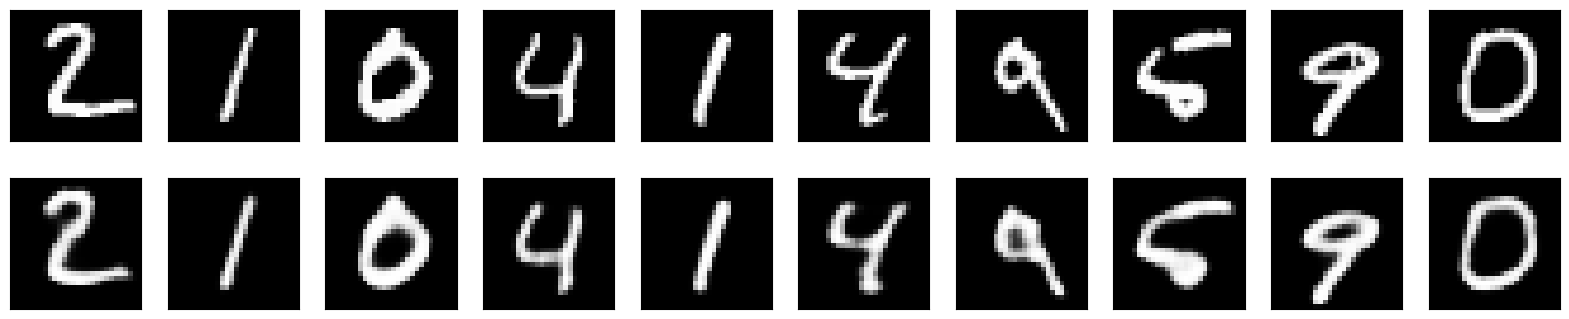

In [14]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


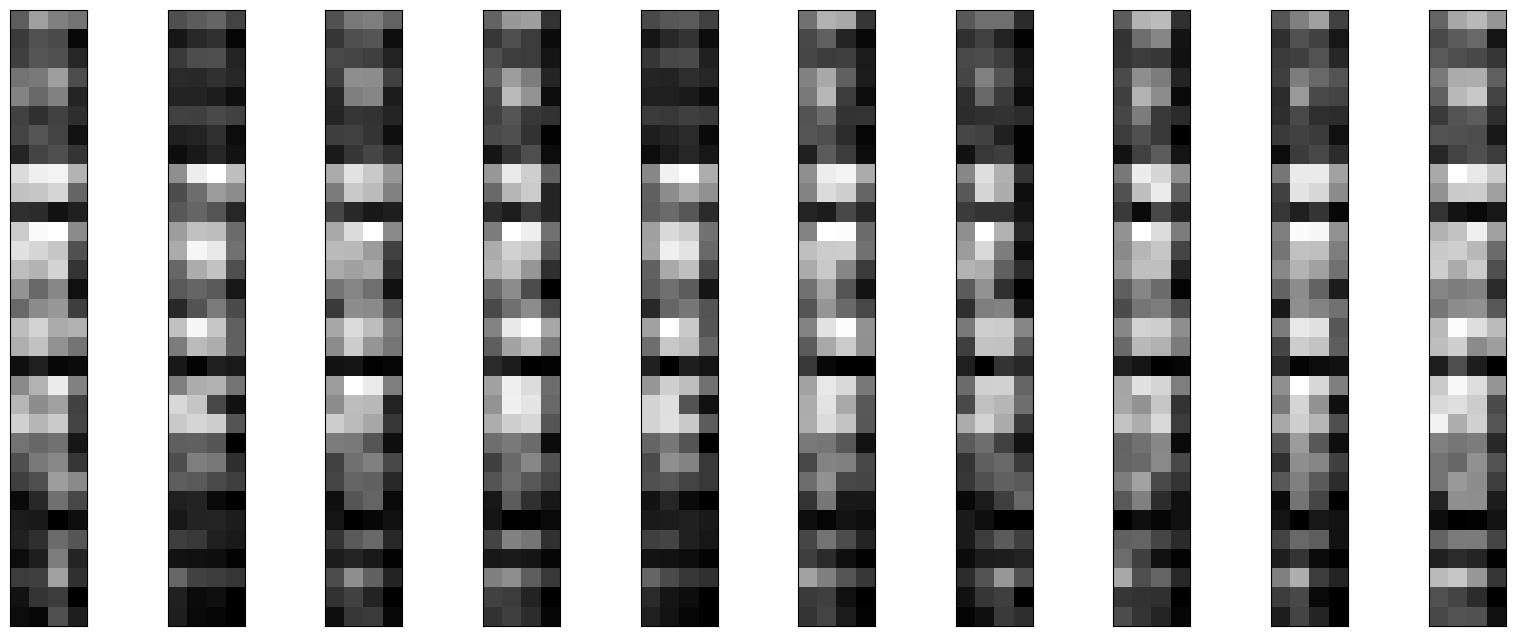

In [16]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()